# Задача "Бинарные данные"

http://mlbootcamp.ru/round/6/sandbox/

![](http://saturdayjam.ru/lj/b036.jpg)


### Постановка задачи

Дано 30 бинарных признаков и 3 целевых класса. В качестве критерия качества решения задачи будет приниматься **точность** классификации, т.е. доля правильно классифицированных объектов.

In [116]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 12, 8 # увеличиваем размер картинок
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.manifold import TSNE
import matplotlib.cm as cm # импортируем цветовые схемы, чтобы рисовать графики.
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [50]:
def read_train():
    X_train = pd.read_csv('data_public/x_train.csv', header=None)
    Y_train = pd.read_csv('data_public/y_train.csv', header=None, names=['target'])
    data = pd.concat([X_train, Y_train], axis=1)
    return data, X_train, Y_train.target

In [51]:
data, X_train, y_train = read_train()
print(data.shape)
data.head()

(210, 31)


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,1,1,1,1,0,0,0,1,0,0,...,1,1,1,1,0,1,1,0,1,1
1,1,0,1,0,0,0,1,1,0,1,...,1,1,0,1,0,0,1,0,0,1
2,0,1,1,0,0,0,0,1,1,1,...,1,0,0,1,1,1,0,1,0,1
3,1,0,1,1,0,1,0,1,1,0,...,1,0,0,1,0,1,1,1,0,0
4,1,1,0,0,1,0,0,1,0,1,...,1,0,1,1,1,1,0,1,1,2


In [4]:
# проверим пропуски и то как распределены значения признаков
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,...,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.390476,0.523810,0.528571,0.504762,0.500000,0.538095,0.495238,0.547619,0.504762,0.514286,...,0.542857,0.504762,0.533333,0.495238,0.438095,0.519048,0.452381,0.557143,0.438095,1.033333
std,0.489023,0.500626,0.500376,0.501172,0.501195,0.499738,0.501172,0.498917,0.501172,0.500990,...,0.499350,0.501172,0.500080,0.501172,0.497339,0.500831,0.498917,0.497911,0.497339,0.820686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [7]:
def examine(clf, X, y):
    cv = StratifiedKFold(n_splits=5)
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Score: {} (+/- {})".format(scores.mean(), scores.std() * 2))

In [52]:
clf = LogisticRegression()
examine(clf, X_train, y_train)

Score: 0.39528864005287767 (+/- 0.0678279839014812)


In [42]:
clf = DummyClassifier()
examine(clf, X_train, y_train)

Score: 0.38563458042943655 (+/- 0.08184853580527353)


In [43]:
clf = xgb.XGBClassifier()
examine(clf, X_train, y_train)

Score: 0.3948191564848025 (+/- 0.10276228045050986)


# WAT?

DummyClassifier ~ LogisticRegression ~ **XGBoost**!!! ~> 38% точности?

![](http://www.kino-mira.ru/images/stories/zanimatelnie-fakty/matrix-final/udar.gif)

## В любой непонятной ситуации - думай!

Для начала посмотрим на соотношение классов. И судя по графикам, всё весьма хорошо - можно сказать, что классы сбалансированы.

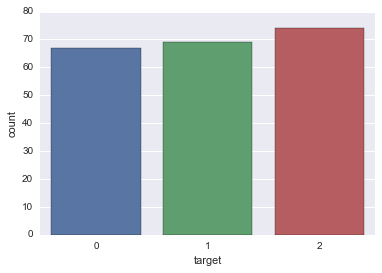

In [53]:
sns.countplot(data=data, x='target')

Логично посмотреть на форму распределения признаков по каждому классу.

Строим для каждого элемента выборки график по его бинарным признакам. Разделим по цветам 3 разных класса. Чем чаще линия проходит через одни и те же точки, тем на графике она более толстая. По оси ординат откладывается среднее значение для данного класса принимать определенное значение признака.

Из графика видно, что в целом есть некоторые отличия в средних значениях, но в целом основная масса находится в середине. Отсюда можно сделать предположение, что признаки хорошо выровнены.

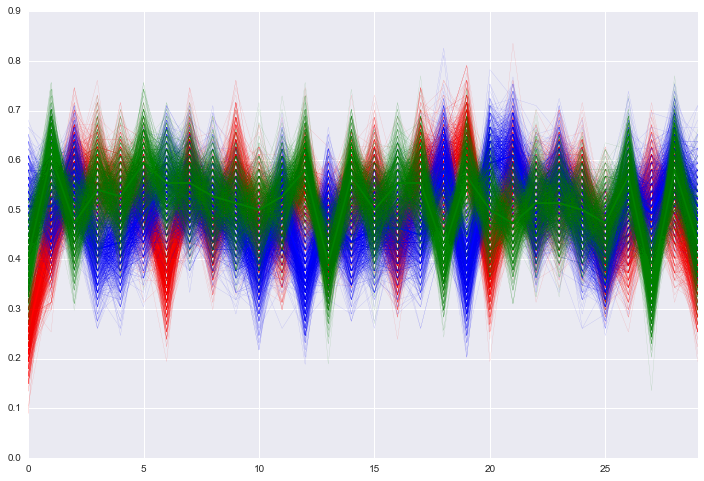

In [119]:
points = [[],[],[]]
for j in range(3):
    for row in data[data['target'] == j].drop(['target'], axis=1).iterrows():
         points[j].append(row[1])

colors = ['red', 'blue', 'green']
for j in range(3):
    sns.tsplot(points[j], err_style="boot_traces", n_boot=800, color=colors[j])

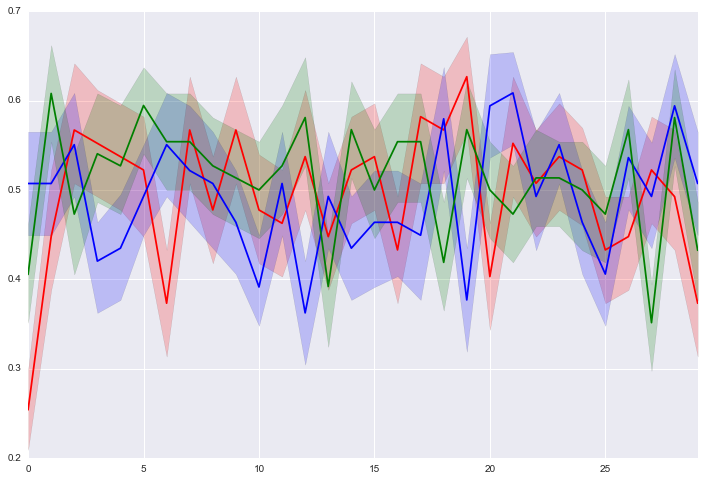

In [128]:
colors = ['red', 'blue', 'green']
for j in range(3):
    sns.tsplot(points[j], n_boot=200, color=colors[j])

Такое ощущение, что синий график как будто немного тяжелее, чем зеленый и красный вместе. Это наверное как-то отражает внутреннюю структуру данных.